# Oblique Shock Calculations
The equation below is the $\theta -\beta - M$ relationship. This is valid only if there can be an oblique shock. Meaning if there is no solution so mach and theta do not produce a value of beta then the shock is detached. 

$$
    tan(\theta)=2cot(\beta)*\bigg[ \frac{M_{1}^{2} sin^{2}(\beta)}{M_{1}^{2} (\gamma +cos(2\beta))+2} \bigg]
$$

In [ ]:
# Run this on google colab environment
!git clone https://github.com/pjuangph/shocks-and-expansion-fans.git
!mv compressible-flows/*.py . 

/var/folders/kx/fcy2wy3j2rs5vy48j0ylgqbm0000gn/T/ipykernel_9918/3549469618.py:7: RuntimeWarning: divide by zero encountered in divide
  tan_theta = 2/np.tan(beta) * (M**2 *np.sin(beta)**2-1) / (M**2 * (gam + np.cos(2*beta))+2)


Max deflection angle to maintain attached shock 36.86


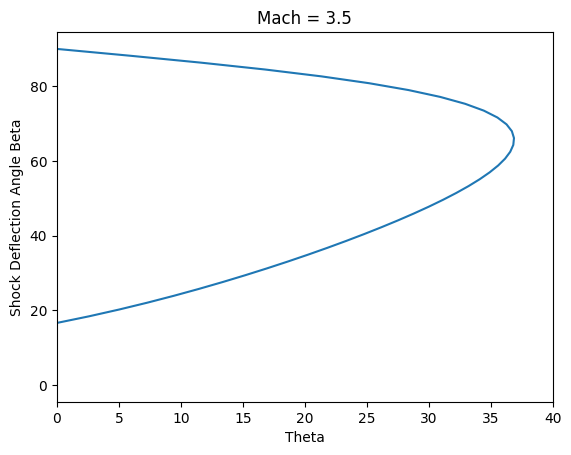

In [1]:
import numpy as np 
import sys
sys.path.insert(0,'../compressible-flows') # if you are cloning and running locally, doesn't really matter if on colab
M=3.5
gam = 1.4 

beta = np.radians(np.linspace(0,90))
tan_theta = 2/np.tan(beta) * (M**2 *np.sin(beta)**2-1) / (M**2 * (gam + np.cos(2*beta))+2)
theta = np.arctan(tan_theta)

import matplotlib.pyplot as plt 
plt.plot(np.degrees(theta),np.degrees(beta))
plt.ylabel('Shock Deflection Angle Beta')
plt.xlabel('Theta')
plt.title(f'Mach = {M}')
plt.xlim(0,40)

theta_max = max(np.degrees(theta))
print(f'Max deflection angle to maintain attached shock {theta_max:0.2f}')

The figure below shows a plot of the shockwave angle for each deflection angle when mach number is varied. Note that the maximum deflection angle (theta) increases as mach number is increased. 

Max deflection angle to maintain attached shock 31.63
Max deflection angle to maintain attached shock 225.88
Max deflection angle to maintain attached shock 839.35
Max deflection angle to maintain attached shock 1316.05
Max deflection angle to maintain attached shock 1643.02
Max deflection angle to maintain attached shock 1950.85
Max deflection angle to maintain attached shock 2221.57
Max deflection angle to maintain attached shock 2355.46
Max deflection angle to maintain attached shock 2430.43


/var/folders/kx/fcy2wy3j2rs5vy48j0ylgqbm0000gn/T/ipykernel_9918/2033258030.py:6: RuntimeWarning: divide by zero encountered in divide
  tan_theta = 2/np.tan(beta) * (M**2 *np.sin(beta)**2-1) / (M**2 * (gam + np.cos(2*beta))+2)


(0.0, 50.0)

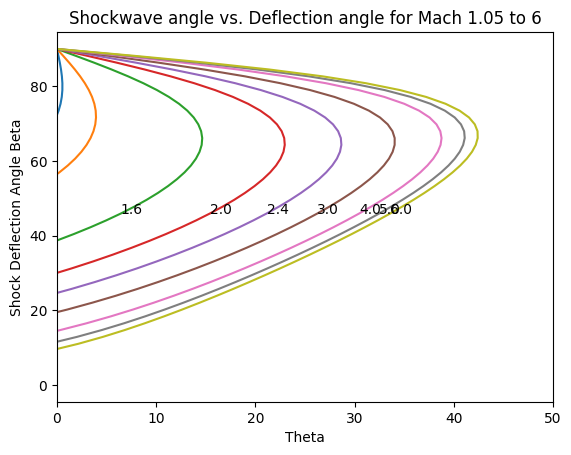

In [2]:
import matplotlib.pyplot as plt 
plt.figure(num=2,clear=True)
Mach = [1.05, 1.2, 1.6, 2, 2.4,3,4,5,6]
for M in Mach:
    beta = np.radians(np.linspace(0,90))
    tan_theta = 2/np.tan(beta) * (M**2 *np.sin(beta)**2-1) / (M**2 * (gam + np.cos(2*beta))+2)
    theta = np.arctan(tan_theta)
    
    theta = np.degrees(theta)
    beta = np.degrees(beta)
    plt.plot(theta,beta)
    plt.ylabel('Shock Deflection Angle Beta')
    plt.xlabel('Theta')
    rng = plt.axis()
    x_scale = 7.15 * 0.78 / (rng[1] - rng[0])         
    y_scale = 5.15 * 0.80 / (rng[3] - rng[2])          
    rotn = np.degrees(np.arctan2((beta[1:]-beta[:-1]) * y_scale,
                                theta[1:]-theta[:-1]) * x_scale)
    i = int(theta.shape[0]/2)
    plt.annotate(f'{M:0.1f}', xy=(theta[i], beta[i]), rotation=rotn[i])
    
    theta_max = max(np.degrees(theta))
    print(f'Max deflection angle to maintain attached shock {theta_max:0.2f}')

    
plt.title('Shockwave angle vs. Deflection angle for Mach 1.05 to 6')    
plt.xlim(0,50)

Note: This plot fails the vertical line test so there are two solutions for a given value of $\theta$. There is a weak solution and a strong solution. Most of the time the solution will be weak. This depends on the ratio of static pressure upstream and downstream. Large P2/P1 will be a strong shock. Small P2/P1 will be a weak oblique shock. External flows your P2/P1 will be P2/Pambient which will equate to a strong shock solution.

Reference: https://seitzman.gatech.edu/classes/ae3450/strongweakoblique.pdf 

![weak_or_strong_oblique_shocks](images/weak_strong_oblique_shock.png)

## Now how do we get Shockwave angle if we know $\theta$ and mach?

We have to find the roots to this equation
$$
    tan(\theta)=2cot(\beta)*\bigg[ \frac{M_{1}^{2} sin^{2}(\beta)}{M_{1}^{2} (\gamma +cos(2\beta))+2} \bigg]
$$

But that's hard so we can use either tables or code! 

In [5]:
from obshock import obshock
beta,Mn1,M2,theta_max = obshock(M=3.5,theta=15,gam=1.4,IsWeak=True) # Get the weak solution

M=3.5 
theta= 15
gam=1.4
beta,Mn1,M2,theta_max = obshock(M=3.5,theta=15,gam=1.4,IsWeak=True)
print(f"Before Oblique Shock \n\t theta:{theta:0.2f} M1:{M:0.2f}")
print(f"After Oblique Shock \n\t Beta:{beta:0.2f} Mn1:{Mn1:0.2f} M2:{M2:0.2f} ThetaMax:{theta_max:0.2f}")

Before Oblique Shock 
	 theta:15.00 M1:3.50
After Oblique Shock 
	 Beta:29.19 Mn1:1.71 M2:2.61 ThetaMax:36.87
